### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [48]:
from tensorflow.keras.preprocessing.image import DirectoryIterator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

### GET DATA AND TRAIN/SPLIT IT

In [4]:
def get_data(val_split = False, test_size = 0.3):
    '''This function returns the '''
    path = '../catchafish/data'
    batch_size = 100000
    
    dir_iterator = DirectoryIterator(directory = path, 
                                     image_data_generator = None, 
                                     target_size = (32, 32), 
                                     batch_size = batch_size,
                                     shuffle = False, 
                                     dtype = int)
    
    X = dir_iterator[0][0]
    y = dir_iterator.labels
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    if val_split:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        return X_train, X_test, y_train, y_test

## Iterations on get_data()

### No shuffling

#### Consistent train and test sets?

We run the equivalent of the get_data() function a first time, without shuffling in the DirectoryIterator:

In [5]:
path = '../catchafish/data'
batch_size = 100000
    
dir_iterator_0 = DirectoryIterator(directory = path, 
                                   image_data_generator = None, 
                                   target_size = (32, 32), 
                                   batch_size = batch_size,
                                   shuffle = False,
                                   dtype = int)
    
X_0 = dir_iterator_0[0][0]
y_0 = dir_iterator_0.labels
    
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.3, random_state = 1)

Found 27370 images belonging to 23 classes.


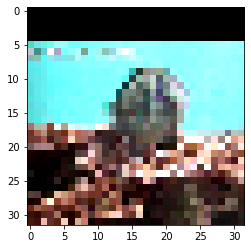

In [6]:
plt.imshow(X_train_0[0])

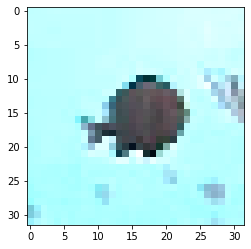

In [7]:
plt.imshow(X_test_0[0])

Let's try a second time without the shuffling and we will see if we get the same X_train and X_test. If not, this means that the split is not successful:

In [8]:
path = '../catchafish/data'
batch_size = 100000
    
dir_iterator_1 = DirectoryIterator(directory = path, 
                                 image_data_generator = None, 
                                 target_size = (32, 32), 
                                 batch_size = batch_size,
                                 shuffle = False,
                                 dtype = int)
    
X_1 = dir_iterator_1[0][0]
y_1 = dir_iterator_1.labels
    
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 1)

Found 27370 images belonging to 23 classes.


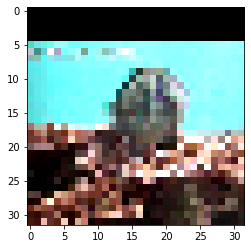

In [9]:
plt.imshow(X_train_1[0])

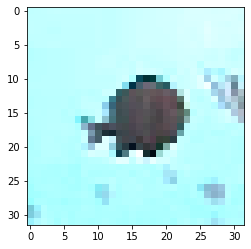

In [10]:
plt.imshow(X_test_1[0])

**We seem to get consistent train and test datasets from a call of the function to another.**  
We can thus continue the analysis of this option for the get_data() function, with a baseline model:

#### Running a baseline model

We start by reshaping X_train and X_test:

In [11]:
X_train_1_reshaped = np.reshape(X_train_1, (X_train_1.shape[0], 
                                            X_train_1.shape[1] * X_train_1.shape[2] * X_train_1.shape[3]))

X_test_1_reshaped = np.reshape(X_test_1, (X_test_1.shape[0], 
                                          X_test_1.shape[1] * X_test_1.shape[2] * X_test_1.shape[3]))

print('New shape of X_train:', X_train_1_reshaped.shape)
print('New shape of X_test:', X_test_1_reshaped.shape)

New shape of X_train: (19159, 3072)
New shape of X_test: (8211, 3072)


In [12]:
logreg_no_shuffling = LogisticRegression(n_jobs = -1, 
                                         multi_class = 'multinomial', 
                                         solver = 'lbfgs', )

In [13]:
logreg_no_shuffling.fit(X_train_1_reshaped, y_train_1)

LogisticRegression(multi_class='multinomial', n_jobs=-1)

In [14]:
logreg_no_shuffling.score(X_test_1_reshaped, y_test_1)

0.8987943003288272

This score seems particularly high and we can check if in absence of any shuffling in the DirectoryIterator, there is a notion of order for instance, which could be a form of data leakage:

In [15]:
y_train_1[:50]

array([ 0,  3,  1,  0,  2,  4,  0,  1,  0,  2,  0,  0,  0,  0,  2,  2,  2,
        0,  0,  3,  0,  3,  0,  0,  0,  0,  0,  3,  3,  2, 20,  0,  0,  0,
        4,  1, 10,  6,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [16]:
pd.Series(y_train_1).value_counts()

0     8402
3     2851
2     2571
1     1885
4     1783
6      313
9      205
8      155
7      148
15     147
5      133
12     122
11     105
10      71
13      69
17      44
16      36
14      29
21      24
18      22
22      16
20      14
19      14
dtype: int64

A priori, there isn't but we can keep on investigating the shuffle topic.

#### With the class_weight argument

In [17]:
#logreg_no_shuffling_cw = LogisticRegression(n_jobs = -1, 
#                                            multi_class = 'multinomial', 
#                                            solver = 'lbfgs', 
#                                            class_weight = 'balanced')

In [18]:
#logreg_no_shuffling_cw.fit(X_train_1_reshaped, y_train_1)

In [19]:
#logreg_no_shuffling_cw.score(X_test_1_reshaped, y_test_1)

### Shuffling and no random seed

We run the equivalent of the get_data() function a first time, with shuffling and no random seed in the DirectoryIterator:

In [20]:
path = '../catchafish/data'
batch_size = 100000
    
dir_iterator_0 = DirectoryIterator(directory = path, 
                                   image_data_generator = None, 
                                   target_size = (32, 32), 
                                   batch_size = batch_size,
                                   shuffle = True,
                                   dtype = int)
    
X_0 = dir_iterator_0[0][0]
y_0 = dir_iterator_0.labels
    
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.3, random_state = 1)

Found 27370 images belonging to 23 classes.


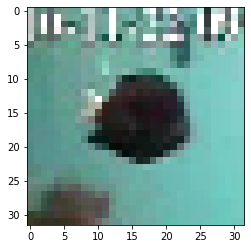

In [21]:
plt.imshow(X_train_0[0])

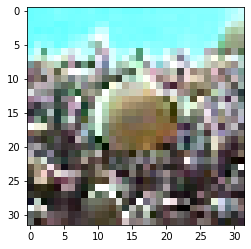

In [22]:
plt.imshow(X_test_0[0])

Let's try a second time with the shuffling and we will see if we get the same X_train and X_test. If not, this means that the split is not successful:

In [23]:
path = '../catchafish/data'
batch_size = 100000
    
dir_iterator_1 = DirectoryIterator(directory = path, 
                                 image_data_generator = None, 
                                 target_size = (32, 32), 
                                 batch_size = batch_size,
                                 shuffle = True,
                                 dtype = int)
    
X_1 = dir_iterator_1[0][0]
y_1 = dir_iterator_1.labels
    
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 1)

Found 27370 images belonging to 23 classes.


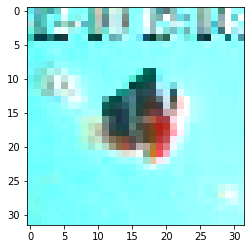

In [24]:
plt.imshow(X_train_1[0])

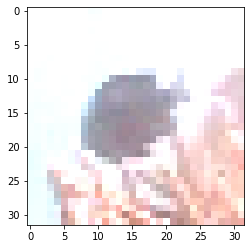

In [25]:
plt.imshow(X_test_1[0])

**We eliminate this method before running any baseline model as we will not obtain consistent train and test datasets from a function call to another.**

### Shuffling and random seed

#### Consistent train and test sets?

We run the equivalent of the get_data() function a first time, with shuffling and a random seed in the DirectoryIterator:

In [26]:
path = '../catchafish/data'
batch_size = 100000
    
dir_iterator_0 = DirectoryIterator(directory = path, 
                                   image_data_generator = None, 
                                   target_size = (32, 32), 
                                   batch_size = batch_size,
                                   shuffle = True, 
                                   seed = 42,
                                   dtype = int)
    
X_0 = dir_iterator_0[0][0]
y_0_encoded = dir_iterator_0[0][1]
y_0 = np.array([np.where(row == 1)[0][0] for row in y_0_encoded])

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.3, random_state = 1)

Found 27370 images belonging to 23 classes.


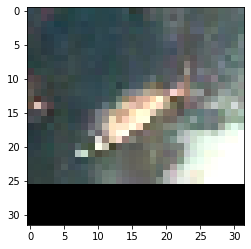

In [27]:
plt.imshow(X_train_0[0])

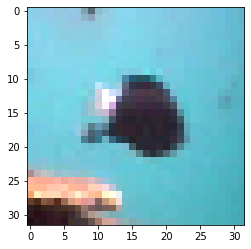

In [28]:
plt.imshow(X_test_0[0])

Let's try a second time with the shuffling and we will see if we get the same X_train and X_test. If not, this means that the split is not successful:

In [29]:
path = '../catchafish/data'
batch_size = 100000
    
dir_iterator_1 = DirectoryIterator(directory = path, 
                                   image_data_generator = None, 
                                   target_size = (32, 32), 
                                   batch_size = batch_size,
                                   shuffle = True, 
                                   seed = 42,
                                   dtype = int)
    
X_1 = dir_iterator_1[0][0]
y_1_encoded = dir_iterator_1[0][1]
y_1 = np.array([np.where(row == 1)[0][0] for row in y_1_encoded])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 1)

Found 27370 images belonging to 23 classes.


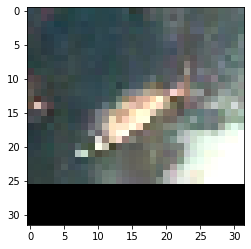

In [30]:
plt.imshow(X_train_1[0])

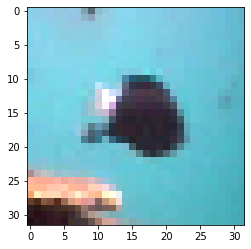

In [31]:
plt.imshow(X_test_1[0])

**We seem to get consistent train and test datasets from a call of the function to another.**  
We can thus continue the analysis of this option for the get_data() function, with a baseline model:

#### Running a baseline model

We start by reshaping X_train and X_test:

In [32]:
X_train_2_reshaped = np.reshape(X_train_1, (X_train_1.shape[0], 
                                            X_train_1.shape[1] * X_train_1.shape[2] * X_train_1.shape[3]))

X_test_2_reshaped = np.reshape(X_test_1, (X_test_1.shape[0], 
                                          X_test_1.shape[1] * X_test_1.shape[2] * X_test_1.shape[3]))

print('New shape of X_train:', X_train_2_reshaped.shape)
print('New shape of X_test:', X_test_2_reshaped.shape)

New shape of X_train: (19159, 3072)
New shape of X_test: (8211, 3072)


In [54]:
logreg_shuffling = LogisticRegression(n_jobs = -1, 
                                      multi_class = 'multinomial', 
                                      solver = 'lbfgs')

In [55]:
logreg_shuffling.fit(X_train_2_reshaped, y_train_1)

LogisticRegression(multi_class='multinomial', n_jobs=-1)

In [35]:
logreg_shuffling.score(X_test_2_reshaped, y_test_1)

0.8991596638655462

#### With the class_weight argument

In [36]:
#logreg_shuffling_cw = LogisticRegression(n_jobs = -1, 
#                                         multi_class = 'multinomial', 
#                                         solver = 'lbfgs', 
#                                         class_weight = 'balanced')

In [37]:
#logreg_shuffling_cw.fit(X_train_2_reshaped, y_train_1)

In [38]:
#logreg_shuffling_cw.score(X_test_2_reshaped, y_test_1)

#### Classification report

In [50]:
print(classification_report(y_test_1, logreg_shuffling.predict(X_test_2_reshaped)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3674
           1       0.89      0.92      0.90       813
           2       0.84      0.84      0.84      1079
           3       0.95      0.96      0.96      1176
           4       0.96      0.96      0.96       741
           5       0.63      0.54      0.58        57
           6       0.86      0.85      0.86       135
           7       0.62      0.44      0.52        70
           8       0.49      0.46      0.48        65
           9       0.92      0.99      0.95        88
          10       0.43      0.52      0.47        31
          11       0.55      0.51      0.53        43
          12       1.00      0.76      0.86        62
          13       0.75      0.12      0.21        24
          14       0.50      0.08      0.14        12
          15       0.75      0.70      0.73        57
          16       0.33      0.23      0.27        13
          17       0.50    

/Users/Paul-Emmanuel/.pyenv/versions/3.7.7/envs/lewagon-data/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## [WIP] Next steps 

In [44]:
X_train, X_test, y_train, y_test = get_data()

Found 27370 images belonging to 23 classes.


### CHECK SHAPES

In [45]:
X_train.shape

(19159, 32, 32, 3)

In [20]:
y_train.shape

(19159,)

In [47]:
y_train

array([0, 3, 1, ..., 0, 1, 0])

In [48]:
y_test.shape

(8211,)

In [49]:
X_test.shape

(8211, 32, 32, 3)

### RESHAPE X_TRAIN and X_TEST

In [50]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 3072)) # (32*32*3 = 3072)

In [51]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 3072))

### MODEL INSTANCING

In [52]:
logreg = LogisticRegression(n_jobs=-1, multi_class='auto', solver='lbfgs')

### FIT THE MODEL

In [53]:
logreg.fit(X_train_reshaped, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

### SCORE THE MODEL

In [54]:
logreg.score(X_test_reshaped, y_test)

0.4198027036901717

In [23]:
y_predict = logreg.predict(X_test_reshaped)

In [24]:
y_predict

array([0, 4, 0, ..., 0, 0, 4])

In [37]:
y_predict.shape

(8211,)

In [39]:
index = 0
bad_predictions = {}
misclassifiedIndexes = []
for label, predict in zip(y_test, y_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
        if label not in bad_predictions.keys():
            bad_predictions[label] = 1
        else:
            bad_predictions[label] += 1
    index += 1

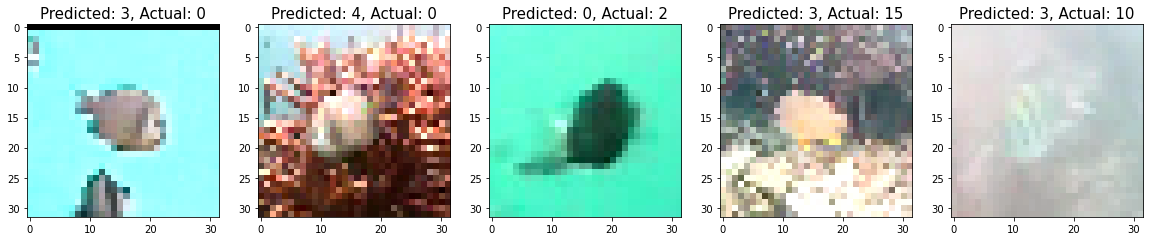

In [41]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test_reshaped[badIndex], (32,32,3)))
    plt.title('Predicted: {}, Actual: {}'.format(y_predict[badIndex], y_test[badIndex]), fontsize = 15)